In [9]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import
import numpy as np
import matplotlib.pyplot as plt
from optimize_hyperparams import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a dataset

In [10]:
from build_poly import build_poly
from standard import standardize 

# number of samples in the dataset
num_data = 1000

# features
x = np.linspace(0.1, 2 * np.pi, num_data)
x = x[:, None]

# observations
offset = 1
noiseLevel = 0.8
y = np.sin(x[:,0]) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x, mean_x, std_x = standardize(x)

print('x: ', x.shape)
print('y: ', y.shape)

x:  (1000, 1)
y:  (1000,)


# Tune degree of the polynomial basis function for ridge regression

tested degree:  [ 1  2  3  4  5  6  7  8  9 10] 

------------------------------------------ cross validation with degree =  1
------------------------------------------ cross validation with degree =  2
------------------------------------------ cross validation with degree =  3
------------------------------------------ cross validation with degree =  4
------------------------------------------ cross validation with degree =  5
------------------------------------------ cross validation with degree =  6
------------------------------------------ cross validation with degree =  7
------------------------------------------ cross validation with degree =  8
------------------------------------------ cross validation with degree =  9
------------------------------------------ cross validation with degree =  10
Optimal degree:  3
Associated testing loss:  0.78880021374 



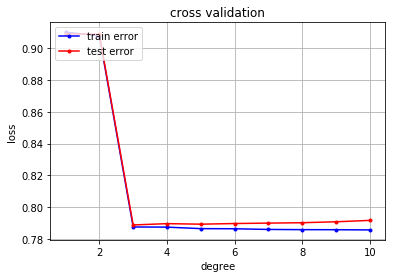

In [11]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['lambda_'] = 0
arg_rr['k_fold'] = 10

# optimization parameters
degree_min = 1 
degree_max = 10
degree_steps = 1

# optimize degree
degree_opt = optimize_degree(y, x, degree_min, degree_max, degree_steps, arg_rr)

# Tune lambda_ (regularization) for ridge regression

tested lambda_:  [  1.00000000e-10   1.66810054e-09   2.78255940e-08   4.64158883e-07
   7.74263683e-06   1.29154967e-04   2.15443469e-03   3.59381366e-02
   5.99484250e-01   1.00000000e+01] 

------------------------------------------ cross validation with lambda_ =  1e-10
------------------------------------------ cross validation with lambda_ =  1.6681005372e-09
------------------------------------------ cross validation with lambda_ =  2.78255940221e-08
------------------------------------------ cross validation with lambda_ =  4.64158883361e-07
------------------------------------------ cross validation with lambda_ =  7.74263682681e-06
------------------------------------------ cross validation with lambda_ =  0.000129154966501
------------------------------------------ cross validation with lambda_ =  0.00215443469003
------------------------------------------ cross validation with lambda_ =  0.035938136638
------------------------------------------ cross validation with lambda_

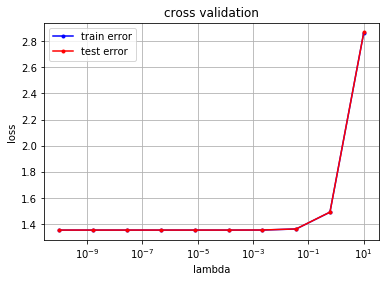

In [12]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['degree'] = 3
arg_rr['k_fold'] = 10

# optimization parameters
lambda_min = -10 
lambda_max = 1
lambda_steps = 10

# optimize lambda_
lambda_opt = optimize_lambda(y, x, lambda_min, lambda_max, lambda_steps, arg_rr)

# Tune gamma (step descent) for least square gradient descent

tested gamma:  [ 1.00002303  1.02593536  1.05251913  1.07979174  1.10777102  1.1364753
  1.16592335  1.19613445  1.22712838  1.25892541] 

------------------------------------------ cross validation with gamma =  1.00002302612
Gradient Descent(9/9): loss MSE=0.9064900260980716
Gradient Descent(9/9): loss MSE=0.9028486826538079
Gradient Descent(9/9): loss MSE=0.9174477762795017
Gradient Descent(9/9): loss MSE=0.9154073813778298
Gradient Descent(9/9): loss MSE=0.9205347372041236
Gradient Descent(9/9): loss MSE=0.9099415323115239
Gradient Descent(9/9): loss MSE=0.9199002037791908
Gradient Descent(9/9): loss MSE=0.9210133854281195
Gradient Descent(9/9): loss MSE=0.9196803592116919
Gradient Descent(9/9): loss MSE=0.9344594856593497
------------------------------------------ cross validation with gamma =  1.02593536351
Gradient Descent(9/9): loss MSE=0.9064900260980716
Gradient Descent(9/9): loss MSE=0.9028486826538079
Gradient Descent(9/9): loss MSE=0.9174477762795017
Gradient Descent(9/9):

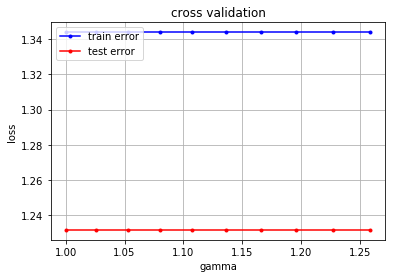

In [10]:
# least squares gradient descent parameters
arg_lsgd = dict()
arg_lsgd['method'] = 'lsgd'
arg_lsgd['loss'] = 'rmse'
arg_lsgd['degree'] = 3
arg_lsgd['k_fold'] = 10
arg_lsgd['max_iters'] = 10
arg_lsgd['initial_w'] = np.zeros(x.shape[1])


# optimization parameters
gamma_min = 1e-5
gamma_max = 1e-1
gamma_steps = 10

# optimize lambda_
gamma_opt = optimize_gamma(y, x, gamma_min, gamma_max, gamma_steps, arg_lsgd)